In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df=df[df['job_title_short']=='Data Analyst']

In [3]:
df_exploded=df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [9]:
skill_stats=df_exploded.groupby('job_skills').agg(
  skill_count=('job_skills','count'),                      #here agg we want to perform and what agg we performed
  median_salary=('salary_year_avg','median')

)

skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(10)

C:\Users\Aadarsh Singh\AppData\Local\Temp\ipykernel_11468\256415770.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(skill_stats['skill_count'][i],skill_stats['median_salary'][i],txt)


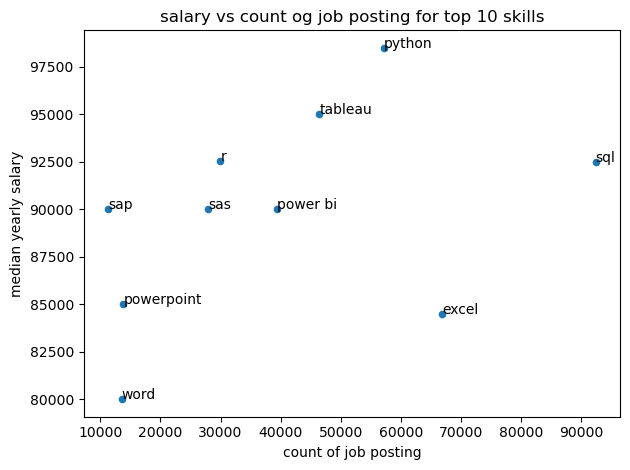

In [ ]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('count of job posting')
plt.ylabel('median yearly salary')
plt.title('salary vs count og job posting for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
  # print(i, txt)
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

plt.show()    



In [16]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0
